In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind

In [12]:
# Reading CSV files into dataframes
daily_activity_df = pd.read_csv("dailyActivity_merged (1).csv")
fitbit_df = pd.read_csv("FitBit data.csv")

#check DataFrames 
daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [13]:
#merging the DataFrames by rows (vertically)
merged_df = pd.concat([daily_activity_df, fitbit_df], ignore_index=True)
merged_df.head()
data_df = merged_df

In [14]:
# find the duplicate rows by  ID, activity date and total distance
duplicate_df = merged_df[merged_df.duplicated(subset=["Id", "ActivityDate", "TotalSteps"])]

# Remove duplicates from the original data based on specific columns
cleaned_data = merged_df.drop_duplicates(subset=['Id', 'ActivityDate', 'TotalSteps'])

# duplicate_df.to_csv("duplicates.csv", index=False)
# cleaned_data.to_csv("cleaned_data.csv", index=False)

cleaned_data.shape

# Print the number of unique fitbit users in the merged and cleaned dataset
no_fitbit_users = len(cleaned_data["Id"].unique())

print(f"No. of unique Fitbit users: {no_fitbit_users} Rows and Columns: {cleaned_data.shape}")

No. of unique Fitbit users: 35 Rows and Columns: (1397, 15)


In [15]:
# Convert 'ActivityDate' to datetime
data_df['ActivityDate'] = pd.to_datetime(data_df['ActivityDate'])
data_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


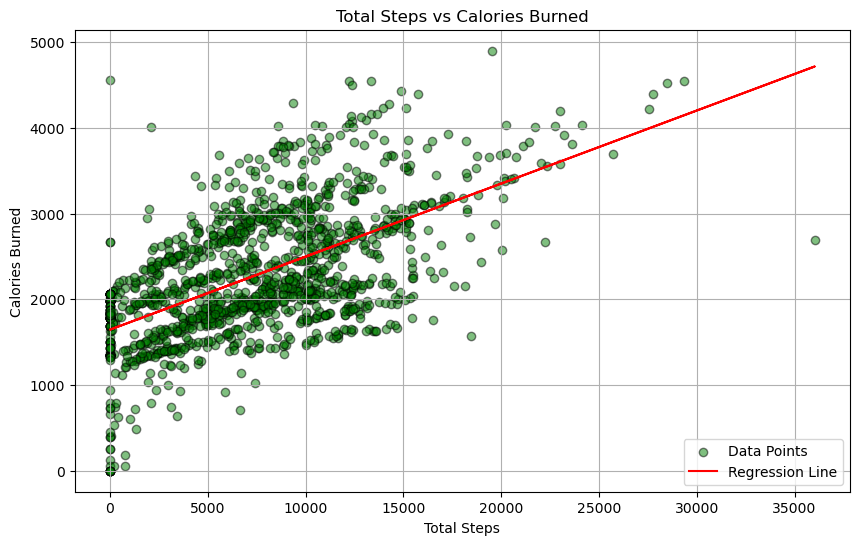

In [17]:
# Scatter plot Total Steps vs Calories with regression line (Q1)
plt.figure(figsize=(10, 6))
plt.scatter(data_df['TotalSteps'], data_df['Calories'],marker="o", color="green",edgecolor="black",alpha=0.5, label='Data Points')
plt.title('Total Steps vs Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data_df['TotalSteps'], data_df['Calories'])
plt.plot(data_df['TotalSteps'], slope * data_df['TotalSteps'] + intercept, color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.savefig('plots\Steps_Calories.png')
plt.show()


Analysis:

This scatter plot shows the relationship between Total Steps and Calories Burned. Each point represents a day's data, plotting the total number of steps against the calories burned. There is a positive correlation, meaning that as the number of steps increases, the calories burned generally increases as well.
The red regression line highlights this trend. Most data points cluster between 0 and 15,000 steps and 1,000 to 3,000 calories, suggesting typical activity levels for most users. Outliers with high steps but lower calories burned indicate differences in activity intensity or individual metabolism.
This variability suggests that personalized fitness plans could help optimize results. Different users burn different calories for the same number of steps due to factors like weight, age, and fitness level. Personalized coaching or feedback based on individual activity patterns could help users optimize their exercise routines for better results.

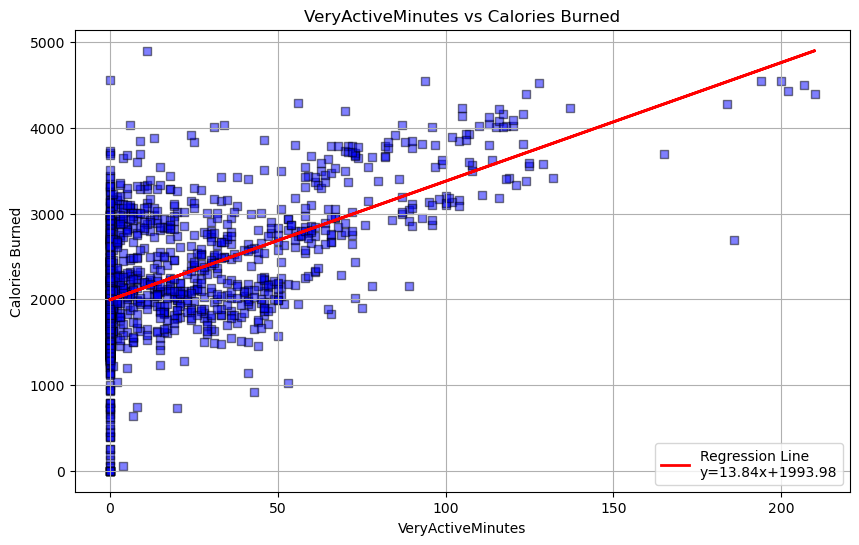

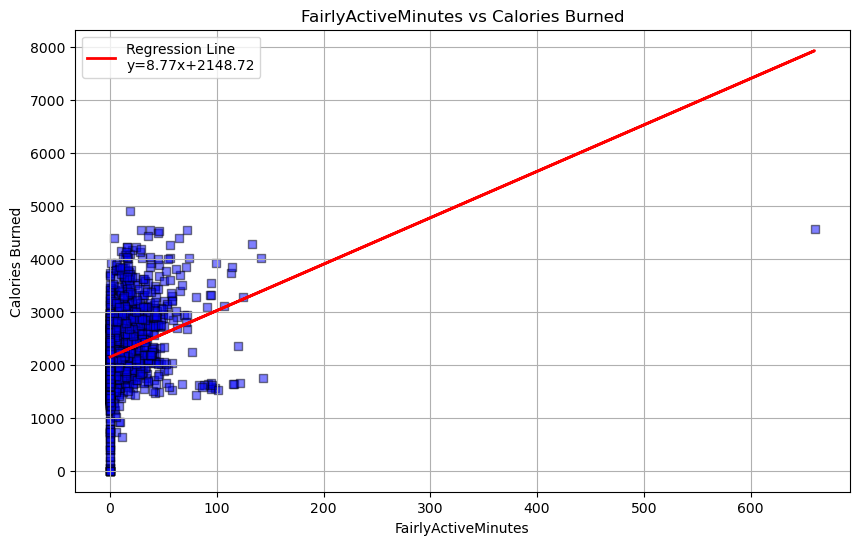

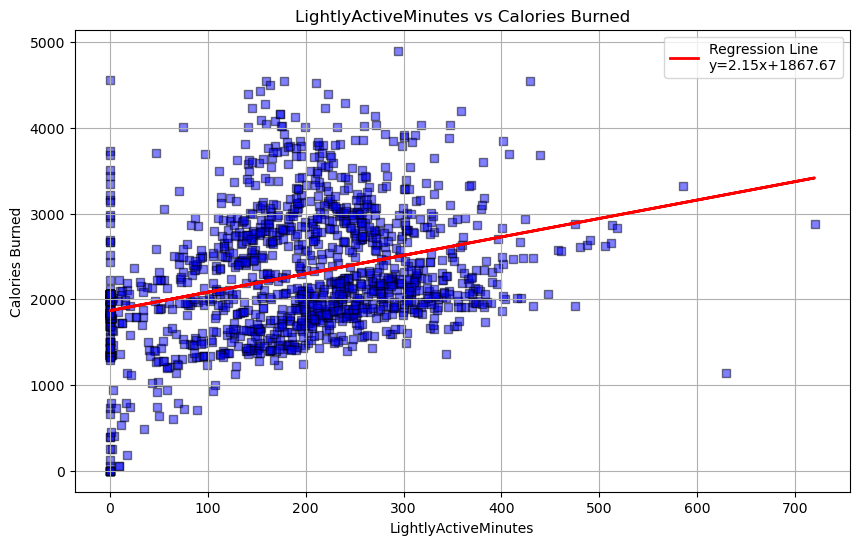

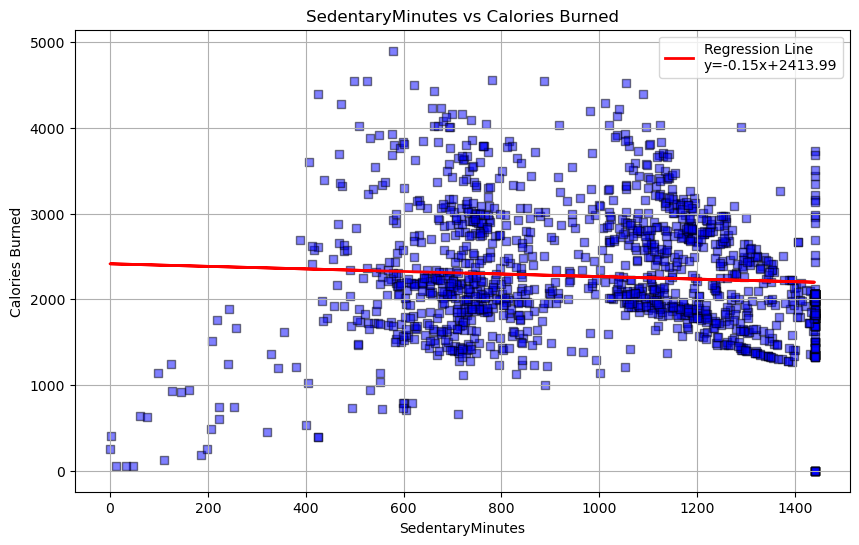

In [19]:
# Scatter plots for each activity vs Calories (Q2)
activities = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

for activity in activities:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_df[activity], data_df['Calories'], marker="s", color="blue", edgecolor="black", alpha=0.5)
    
    # Calculate the regression line of best fit
    slope, intercept = np.polyfit(data_df[activity], data_df['Calories'], 1)
    regression_line = slope * data_df[activity] + intercept
    
    plt.plot(data_df[activity], regression_line, color="red", linewidth=2, label=f'Regression Line\ny={slope:.2f}x+{intercept:.2f}')
    
    plt.title(f'{activity} vs Calories Burned')
    plt.xlabel(activity)
    plt.ylabel('Calories Burned')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'plots/{activity}.png')
    plt.show()

Analysis
These scatter plots illustrate the relationship between different activity levels and calories burned. Each plot represents a specific activity type: Very Active Minutes, Fairly Active Minutes, Lightly Active Minutes, and Sedentary Minutes. The blue squares represent the data points for each day, showing the minutes spent in the specific activity against the calories burned.

For each activity type, there is a red regression line that shows the overall trend between the activity minutes and calories burned. The slope and intercept of the regression line are displayed on each plot, indicating the strength and direction of the relationship.

Very Active Minutes vs Calories Burned: There is a strong positive correlation, meaning that as very active minutes increase, the calories burned also increase significantly. This is expected as intense physical activity burns more calories.

Fairly Active Minutes vs Calories Burned: There is a positive correlation, although not as strong as very active minutes. Moderate activity also contributes to calories burned, but less intensely.

Lightly Active Minutes vs Calories Burned: The correlation is weaker compared to very active and fairly active minutes. Light activities burn fewer calories, but there is still a positive trend.

Sedentary Minutes vs Calories Burned: The correlation is weak or even slightly negative, indicating that more sedentary time does not contribute significantly to calorie burning. In fact, spending more time sedentary might correlate with burning fewer calories overall.

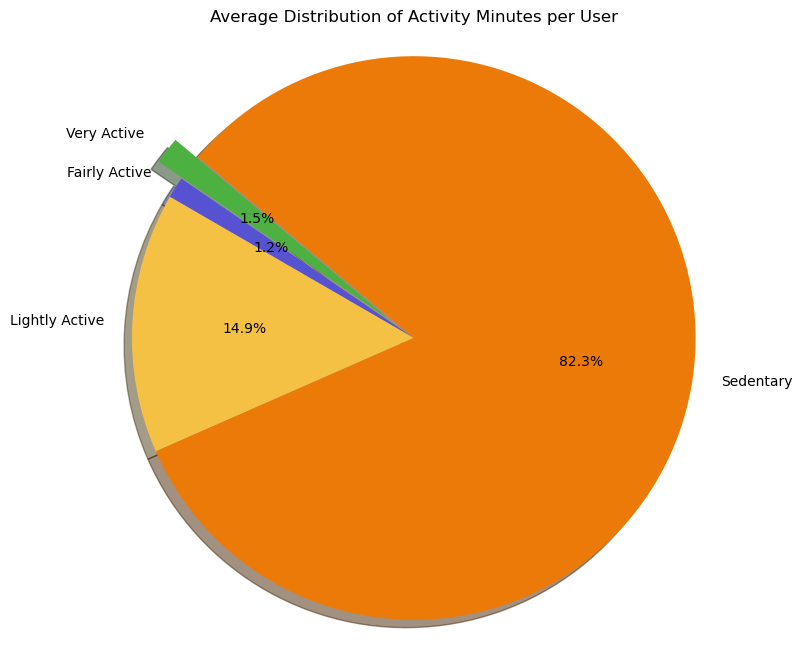

In [21]:
# Group by 'Id' and calculate the mean activity minutes for each user(Q3)
grouped_df = data_df.groupby('Id').mean()

# Calculate total (mean) minutes for each activity type
total_very_active = grouped_df['VeryActiveMinutes'].mean()
total_fairly_active = grouped_df['FairlyActiveMinutes'].mean()
total_lightly_active = grouped_df['LightlyActiveMinutes'].mean()
total_sedentary = grouped_df['SedentaryMinutes'].mean()

# Pie chart
labels = ['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary']
sizes = [total_very_active, total_fairly_active, total_lightly_active, total_sedentary]
colors = ['#4CB140','#5752D1','#F4C145','#EC7A08']
explode = (0.1, 0, 0, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Average Distribution of Activity Minutes per User')
plt.axis('equal') 
plt.savefig('plots/activity_minutes.png')
plt.show()



Analysis
This pie chart displays the average distribution of activity minutes per user, categorized into four types: Very Active, Fairly Active, Lightly Active, and Sedentary. The data was grouped by user ID, and the mean activity minutes for each category were calculated to represent the average activity levels.

Very Active Minutes: This category is shown in green and has the highest emphasis with a slight "explosion" in the chart. It accounts for a small percentage of the total activity time, highlighting that users spend less time in very intense activities.

Fairly Active Minutes: Represented in blue, this category makes up a moderate portion of the activity distribution. Users spend a fair amount of time in moderately intense activities.

Lightly Active Minutes: Shown in yellow, this category forms a significant part of the pie, indicating that users frequently engage in light activities throughout the day.

Sedentary Minutes: Represented in orange, this category takes up the largest portion of the pie, indicating that users spend most of their time being sedentary.

The chart shows that while users do engage in various levels of physical activity, the majority of their time is spent being sedentary, followed by light activities. More intense activities like very active and fairly active minutes account for a smaller share. This distribution suggests that there may be opportunities to encourage users to increase their very active and fairly active minutes to achieve better health outcomes.

In [22]:
print(grouped_df.dtypes)

ActivityDate                datetime64[ns]
TotalSteps                         float64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                  float64
FairlyActiveMinutes                float64
LightlyActiveMinutes               float64
SedentaryMinutes                   float64
Calories                           float64
dtype: object


In [23]:
# Perform pairwise t-tests for each pair of activity types
t_tests = {}

# Iterate over pairs of columns and perform t-tests
for i, col1 in enumerate(grouped_df.columns):
    for col2 in grouped_df.columns[i+1:]:
        if grouped_df[col1].dtype == 'datetime64[ns]' or grouped_df[col2].dtype == 'datetime64[ns]':
            continue  # Skip datetime columns for t-tests
        t_stat, p_value = ttest_ind(grouped_df[col1], grouped_df[col2])
        t_tests[f"{col1} vs {col2}"] = (t_stat, p_value)

# Print the results
for pair, (t_stat, p_value) in t_tests.items():
    print(f"T-test for {pair}: t-statistic = {t_stat}, p-value = {p_value:.4f}")

T-test for TotalSteps vs TotalDistance: t-statistic = 10.948841581742665, p-value = 0.0000
T-test for TotalSteps vs TrackerDistance: t-statistic = 10.948939908897932, p-value = 0.0000
T-test for TotalSteps vs LoggedActivitiesDistance: t-statistic = 10.95642949000478, p-value = 0.0000
T-test for TotalSteps vs VeryActiveDistance: t-statistic = 10.954611809733839, p-value = 0.0000
T-test for TotalSteps vs ModeratelyActiveDistance: t-statistic = 10.955896295239564, p-value = 0.0000
T-test for TotalSteps vs LightActiveDistance: t-statistic = 10.951878232104287, p-value = 0.0000
T-test for TotalSteps vs SedentaryActiveDistance: t-statistic = 10.95670872866958, p-value = 0.0000
T-test for TotalSteps vs VeryActiveMinutes: t-statistic = 10.926942515187822, p-value = 0.0000
T-test for TotalSteps vs FairlyActiveMinutes: t-statistic = 10.93334228878976, p-value = 0.0000
T-test for TotalSteps vs LightlyActiveMinutes: t-statistic = 10.668452945177641, p-value = 0.0000
T-test for TotalSteps vs Sedent

T-testing results:

All p-values are very low (0.0000), suggesting strong evidence against the null hypothesis.
This indicates significant relationships between each pair of activity metrics tested, such as TotalSteps vs TotalDistance, TotalSteps vs Calories, etc.

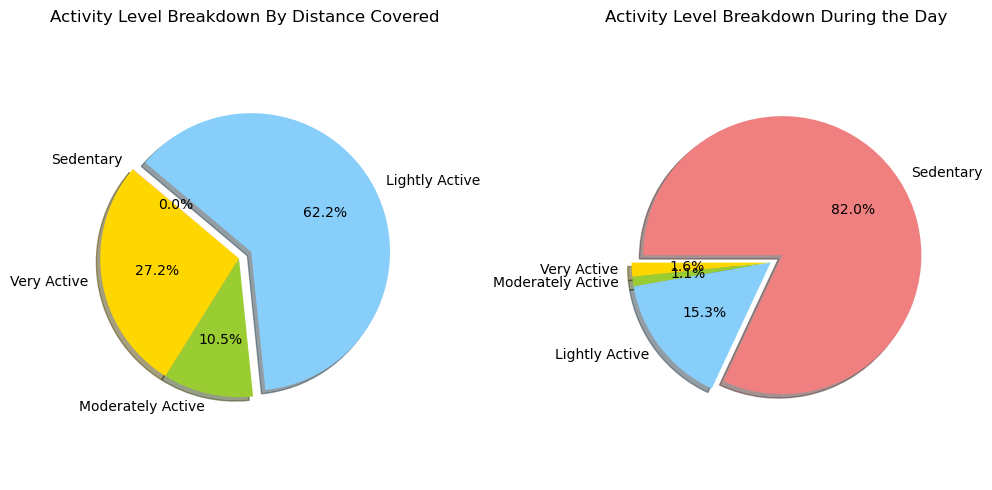

In [24]:
# Generate a pie plot showing the distribution of logged minutes by activity level
very_active_dist = cleaned_data["VeryActiveDistance"].mean()
mod_active_dist = cleaned_data["ModeratelyActiveDistance"].mean()
lightly_active_dist = cleaned_data["LightActiveDistance"].mean()
sedentary_dist = cleaned_data["SedentaryActiveDistance"].mean()
dist_means = [very_active_dist, mod_active_dist, lightly_active_dist, sedentary_dist]

very_active_mins = cleaned_data["VeryActiveMinutes"].mean()
mod_active_mins = cleaned_data["FairlyActiveMinutes"].mean()
lightly_active_mins = cleaned_data["LightlyActiveMinutes"].mean()
sedentary_mins = cleaned_data["SedentaryMinutes"].mean()
mins_means = [very_active_mins, mod_active_mins, lightly_active_mins, sedentary_mins]

labels = ["Very Active", "Moderately Active", "Lightly Active", "Sedentary"]
colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
explode1 = (0, 0, 0.1, 0) # explode largest
explode2 = (0, 0, 0, 0.1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(dist_means, explode=explode1, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Activity Level Breakdown By Distance Covered")

plt.subplot(1, 2, 2)
plt.pie(mins_means, explode=explode2, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.title("Activity Level Breakdown During the Day")

plt.tight_layout()
plt.show()

**Question**
Is there a relationship between time spent engaging in exercise mid-week and weekends?

**Hypothesis** 
If most adults work mid-week they will engage in exercise more on weekends compared to weekdays.

**Null Hypothesis** 
There is no significant difference in average minutes engaged in exercise between weekdays and weekends.

**Alternative Hypothesis** 
There is an increase in average minutes engaged in exercise on weekends compared to weekdays.

In [25]:
# Check the data type of the column
data_type = cleaned_data["ActivityDate"].dtype
data_type_ID = cleaned_data["Id"].dtype
data_type_ID

# Convert to datetime to identify days of the week
cleaned_data["ActivityDate"] = pd.to_datetime(cleaned_data['ActivityDate'])
data_type = cleaned_data["ActivityDate"].dtype
data_type_ID

dtype('int64')

In [26]:
# Add another column called DayOfWeek (where 0-4 is mid-week and 5+6 is weekend)
cleaned_data["DayOfWeek"] = cleaned_data["ActivityDate"].dt.dayofweek
# Sum columns 11, 12 and 13
cleaned_data["TotalActiveMin"] = cleaned_data["VeryActiveMinutes"] + cleaned_data["FairlyActiveMinutes"] \
    + cleaned_data["LightlyActiveMinutes"]

cleaned_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,366
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,257
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,3,222
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,4,272
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,5,267


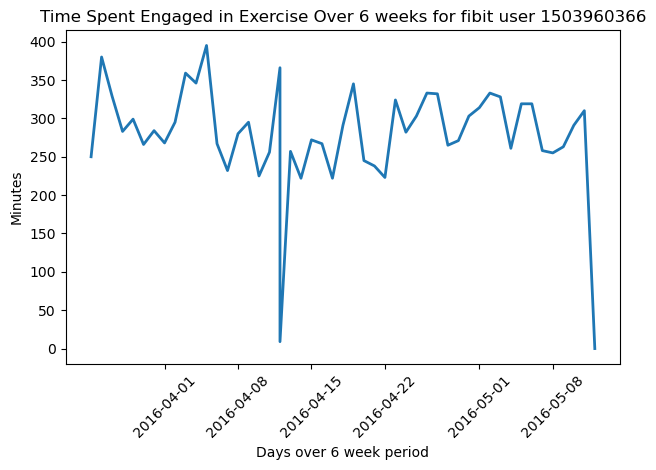

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin
940,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,4,250
941,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,5,380
942,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,6,329
943,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,0,283
944,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,1,299


In [27]:
# Plot TotalSteps over time on line graph for a single user
single_user = cleaned_data.loc[(cleaned_data["Id"] == 1503960366)].sort_values(by="ActivityDate")

plt.plot(single_user["ActivityDate"], single_user["TotalActiveMin"], linestyle="-", linewidth=2)
plt.title("Time Spent Engaged in Exercise Over 6 weeks for fibit user 1503960366")
plt.xlabel("Days over 6 week period")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

single_user.head()

The correlation between time engaged in exercise over time: PearsonRResult(statistic=0.06722308709896345, pvalue=0.01196566609867824)


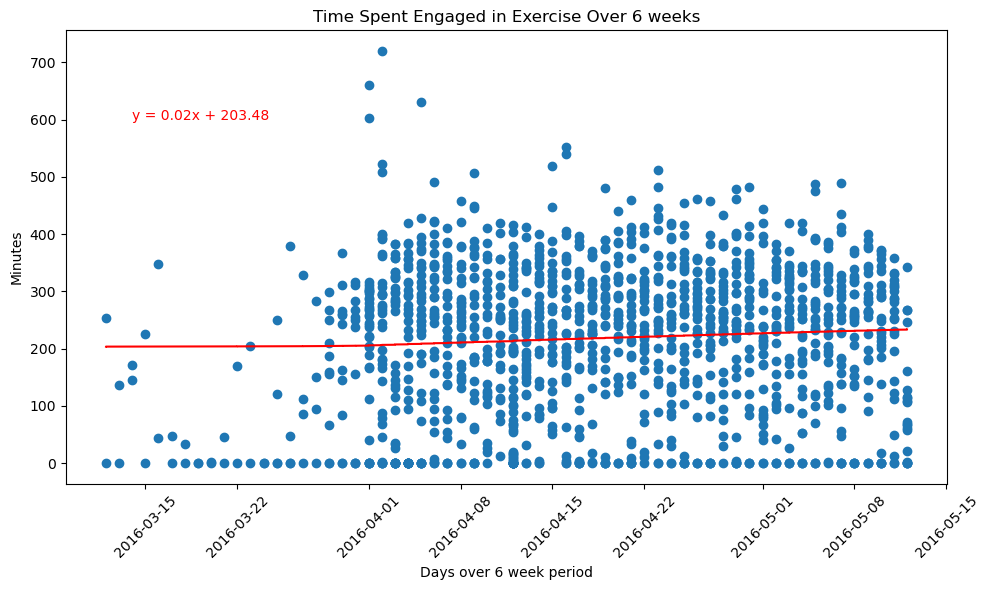

In [28]:
# Plot TotalSteps over time on scatter plot for all users
sorted_df = cleaned_data.sort_values(by='ActivityDate')
x_data = range(len(sorted_df))
corr_coeff = stats.pearsonr(x_data, sorted_df["TotalActiveMin"])
print(f"The correlation between time engaged in exercise over time: {corr_coeff}")

# Perform a linear regression on mouse weight versus tumor size
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_data, sorted_df["TotalActiveMin"])

# Create equation of line 
trend_line = slope * x_data + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.figure(figsize=(10, 6))
plt.scatter(sorted_df["ActivityDate"], sorted_df["TotalActiveMin"])

plt.plot(sorted_df["ActivityDate"], trend_line, "r-")
plt.annotate(line_eq,(sorted_df["ActivityDate"].iloc[5],600),fontsize=10,color="red")

plt.title("Time Spent Engaged in Exercise Over 6 weeks")
plt.xlabel("Days over 6 week period")
plt.ylabel("Minutes")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [29]:
# Group by day of the week
avg_daily_min = cleaned_data.groupby("DayOfWeek")["TotalActiveMin"].mean()

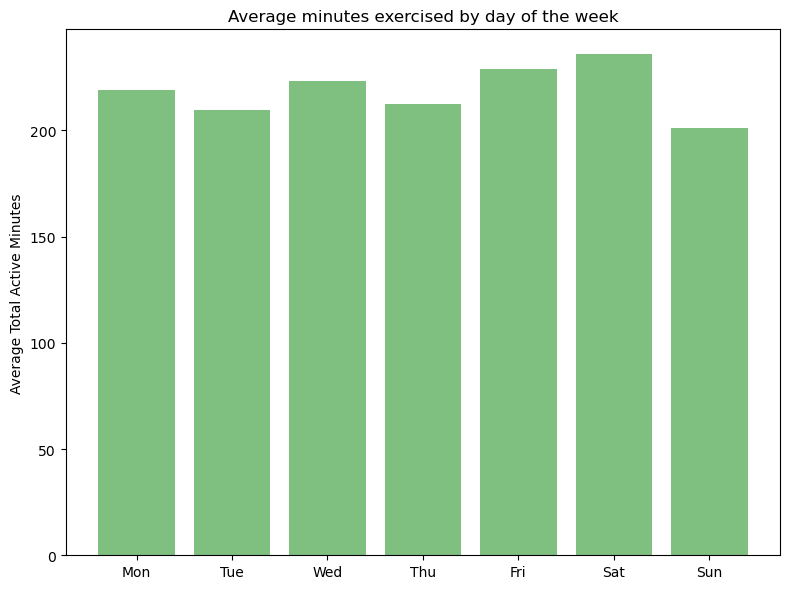

In [30]:
# Create bar chart to show the average minutes exercised by day of the week
plt.figure(figsize=(8,6))

plt.bar(avg_daily_min.index, avg_daily_min.values, color=["green"], alpha=(0.5))

plt.ylabel("Average Total Active Minutes")
plt.title("Average minutes exercised by day of the week")
plt.xticks(avg_daily_min.index, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.tight_layout()
plt.show()

In [31]:
# Split sample randomly by each ID to meet independence test
unique_ids = cleaned_data['Id'].unique()

np.random.seed(7)
np.random.shuffle(unique_ids)

sample1_ids = unique_ids[:17] #taking first 17 elements after shuffling
sample2_ids = unique_ids[18:] #taking remaining

# split dataframe by id if id is in list 1 or list 2
sample_1_df = cleaned_data[cleaned_data["Id"].isin(sample1_ids)]
sample_2_df = cleaned_data[cleaned_data["Id"].isin(sample2_ids)]

# Sort two sample groups into weekend and weekday groups summing columns 11, 12 and 13, where 0-4 is mid-week and 5+6 is weekend)
w_day = sample_2_df[sample_2_df['DayOfWeek'] < 5]
w_end = sample_1_df[sample_1_df['DayOfWeek'] >= 5]
weekday_ave = w_day["TotalActiveMin"].mean()
weekend_ave = w_end["TotalActiveMin"].mean()

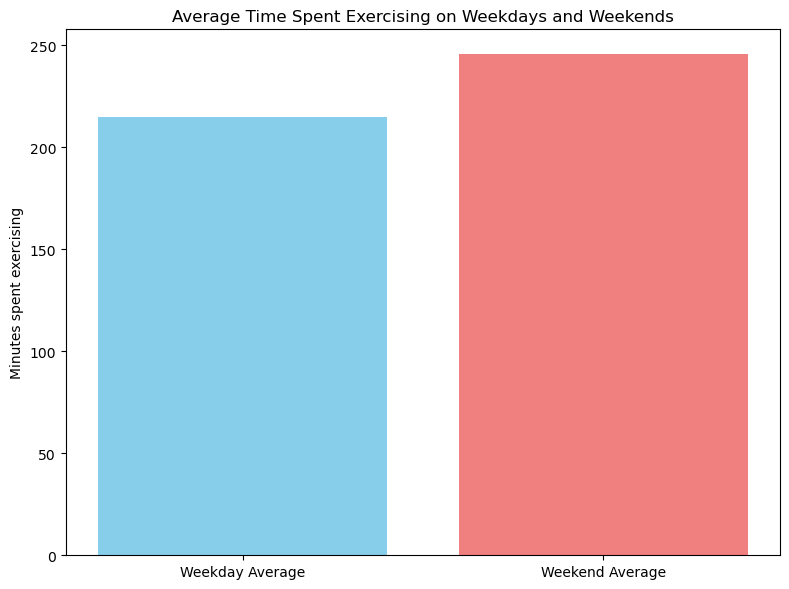

In [32]:
# Create bar chart to show the proportion of weekday average vs weekend population proportion meeting guideline
plt.figure(figsize=(8,6))

plt.bar(["Weekday Average", "Weekend Average"], [weekday_ave, weekend_ave], color=["skyblue", "lightcoral"])
plt.ylabel("Minutes spent exercising")
plt.title("Average Time Spent Exercising on Weekdays and Weekends")
plt.tight_layout()
plt.show()

It appears, according to the averages of weekday active minutes (215minutes) and weekend active minutes (245.6minutes) that more time is spent exercising on the weekend.

In [33]:
w_day.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin
92,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.0,0.00,4.43,0.0,0,0,339,1101,2030,1,339
93,1844505072,2016-04-13,4929,3.26,3.26,0.0,0.0,0.00,3.26,0.0,0,0,248,1192,1860,2,248
94,1844505072,2016-04-14,7937,5.25,5.25,0.0,0.0,0.00,5.23,0.0,0,0,373,843,2130,3,373
95,1844505072,2016-04-15,3844,2.54,2.54,0.0,0.0,0.00,2.54,0.0,0,0,176,527,1725,4,176
98,1844505072,2016-04-18,4597,3.04,3.04,0.0,0.0,0.48,2.56,0.0,0,12,217,1211,1814,0,229


In [34]:
w_end.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,5,267
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,6,222
11,1503960366,2016-04-23,14371,9.04,9.04,0.0,2.81,0.87,5.36,0.0,41,21,262,732,1949,5,324
12,1503960366,2016-04-24,10039,6.41,6.41,0.0,2.92,0.21,3.28,0.0,39,5,238,709,1788,6,282
18,1503960366,2016-04-30,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947,5,303


In [35]:
# test for normality
statistic1, p_value1 = stats.normaltest(sample_1_df["TotalActiveMin"])
statistic2, p_value2 = stats.normaltest(sample_2_df["TotalActiveMin"])

print(f'Normal Test - Sample 1: statistic={statistic1:.4f}, p-value={p_value1:.4f}')
print(f'Normal Test - Sample 2: statistic={statistic2:.4f}, p-value={p_value2:.4f}')

Normal Test - Sample 1: statistic=36.3456, p-value=0.0000
Normal Test - Sample 2: statistic=6.8509, p-value=0.0325


** The randomised sample sets were so small that I think it affects the normal test. Only 17 in each sample. With a larger sample I would have received much more accurate results. Everytime I run the code only 1 sample would occassionally satisfy the normal test. If p-value is > than 0.05 then there is evidence to support the assumption of normality. 

I also suspect that because this was data not from general public but from a particular population gathered during a study that the participants all aimed for 10000 steps, affecting the normal distribution of the data.

In [36]:
# Independent T-test because only 2 groups, otherwise ANOVA

t_statistic, p_value = stats.ttest_ind(w_day.TotalActiveMin, w_end.TotalActiveMin, equal_var=False) # Welsh ttest because didnt verify if std devs =
stats.ttest_ind(w_day.TotalActiveMin, w_end.TotalActiveMin, equal_var=False) # Welsh ttest because didnt verify if std devs =

TtestResult(statistic=-2.6515870215256974, pvalue=0.00834199207317236, df=385.4705282734812)

In [37]:
# if random sample changes the p-value then print relevant statement

if p_value < 0.05:
    print(f"T-test p-value is small ({p_value}) and less than significance level 0f 0.05, therefore we reject the null hypothesis")
else:
    print(f"T-test p-value is large ({p_value}) and greater than significance level 0f 0.05, therefore we fail to reject the null hypothesis")

T-test p-value is small (0.00834199207317236) and less than significance level 0f 0.05, therefore we reject the null hypothesis


** Based on the data, there is sufficient evidence to suggest that there is a statistically significant difference in the time engaged in physical activity between weekends and weekdays. We are in favour of the alternative hypothesis where Fitbit users exercise for longer time periods on weekends.

-------------------------------------------------------------------------------------------------------------------

**Question** Do fitbit users meet the weekly guideline more than the general population of Australia?

**Hypothesis** 
If activity level is influenced by wearing a Fitbit pedometer then Fitbit users will meet their minimum exercise guidleines of 30min of moderate activity for most days (5) of the week or (150min) more so than the general Australian population of 22.5%.

**Null Hypothesis** 
There is no significant difference in meeting their weekly guidelines compared to the general population

**Alternative Hypothesis** 
If activity level is influenced by wearing a Fitbit pedometer then fitbit users will meet their physical activity guidelines more than the general population.

In [38]:
# Sum columns 11, 12
cleaned_data["ModVeryActiveTotal"] = cleaned_data["VeryActiveMinutes"] + cleaned_data["FairlyActiveMinutes"]
cleaned_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin,ModVeryActiveTotal
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,366,38
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,257,40
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,3,222,41
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,4,272,63
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,5,267,46


In [39]:
# Calculate total weekly minutes of moderate and very active activity for each user over the course of 6 weeks
total_weekly_activity = cleaned_data.groupby("Id")["ModVeryActiveTotal"].sum() / 6
weekly_activity_df = pd.DataFrame(total_weekly_activity)
weekly_activity_df.head()
# Add a column for the proportion of the sample meeting the guideline
weekly_activity_df["MeetsGuideline"] = weekly_activity_df["ModVeryActiveTotal"] >= 150
weekly_activity_df.head()

,ModVeryActiveTotal,MeetsGuideline
Id,,
1503960366,462.666667,True
1624580081,79.000000,False
1644430081,251.833333,True
1844505072,10.333333,False
1927972279,14.166667,False


In [40]:
# calculate proportion meeting the guideline in the sample
proportion_meeting_sample = weekly_activity_df["MeetsGuideline"].mean()*100
population_mean = 22.5

# Print the proportion
print(f"Proportion Fitbit sample users meeting the guideline: {proportion_meeting_sample:.2f}% vs 22.5% for the population Australia")

Proportion Fitbit sample users meeting the guideline: 48.57% vs 22.5% for the population Australia


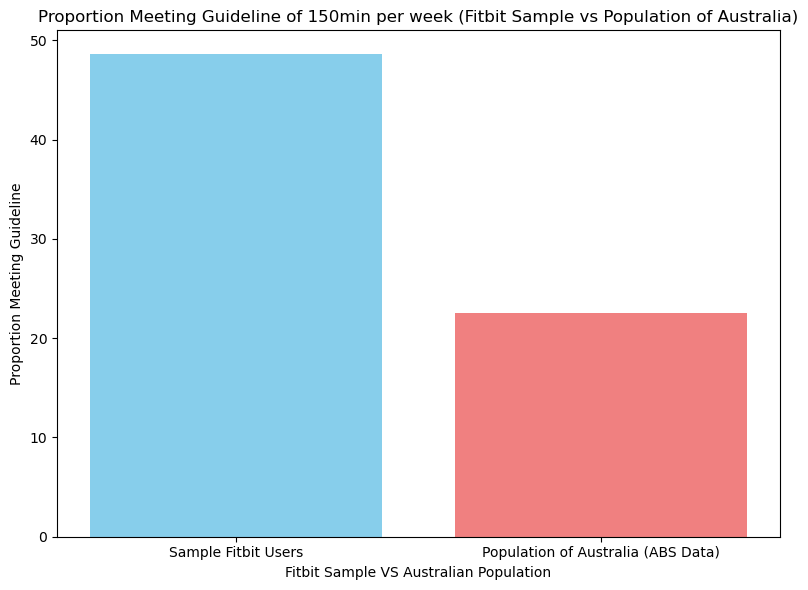

In [41]:
# Create bar chart to show the proportion of sample vs the population proportion meeting guideline
plt.figure(figsize=(8,6))

plt.bar(["Sample Fitbit Users", "Population of Australia (ABS Data)"], [proportion_meeting_sample, population_mean], color=["skyblue", "lightcoral"])
plt.xlabel("Fitbit Sample VS Australian Population")
plt.ylabel("Proportion Meeting Guideline")
plt.title("Proportion Meeting Guideline of 150min per week (Fitbit Sample vs Population of Australia)")
plt.tight_layout()
plt.show()

From here if I had the mean of the number of minutes that Australians exercise for on a weekly basis rather than the percentage, I could have performed a one sample t-test to see if the difference as measured in means, happen by chance or if it is statistically significant. 

I could have performed a z-test with the percentage population mean as it is known but we have not covered it yet in class.